In [1]:
import sys
# path = r'C:\Users\wander\Documents\Python Scripts\PAREPYDEV'
path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY' # PC notebook luiz
# path = r'C:\Users\wander\Documents\GitHub\PAREPYDEV_NEW'
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 30000, 
             'numerical model': {'model sampling': 'lhs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': None,
        }

# Call algorithm
sampling_algorithm_structural_analysis_kernel(setup)

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,57.442535,7.549681,0.198543,4595.402775,1565.587592,3029.815184,0.0
1,45.864902,7.707676,0.348751,3669.192144,2450.129444,1219.062700,0.0
2,25.225341,7.745919,0.370639,2018.027258,2579.843649,-561.816391,1.0
3,30.891849,7.760881,0.356244,2471.347946,2496.700057,-25.352111,1.0
4,22.790799,7.797178,0.378734,1823.263945,2629.824089,-806.560145,1.0
...,...,...,...,...,...,...,...
29995,40.357419,17.423976,0.248329,3228.593502,2389.150918,839.442584,0.0
29996,40.275664,17.601206,0.249041,3222.053087,2402.870656,819.182431,0.0
29997,40.341357,18.035581,0.248661,3227.308539,2424.110827,803.197712,0.0
29998,40.253609,18.358674,0.248533,3220.288733,2440.810645,779.478088,0.0


In [3]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'normal', 'parameters': {'mean': 10.2, 'sigma': 1.12, 'cov': {'pho': 0.30, 'var': 0}}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 10, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': None,
        }

# Call algorithm
sampling_algorithm_structural_analysis_kernel(setup)

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,36.044140,9.232827,0.238504,2883.531220,1889.527934,994.003286,0.0
1,44.511109,8.175343,0.271329,3560.888693,2023.861831,1537.026862,0.0
2,39.100653,9.960539,0.244021,3128.052201,1961.000584,1167.051616,0.0
3,39.166233,9.090551,0.243411,3133.298674,1910.464623,1222.834051,0.0
4,41.645073,10.280021,0.256260,3331.605837,2049.627717,1281.978120,0.0
5,37.371139,11.454475,0.250012,2989.691147,2076.613216,913.077931,0.0
6,39.381615,8.286363,0.235454,3150.529172,1820.630876,1329.898296,0.0
7,44.963513,10.307076,0.280656,3597.081075,2193.366286,1403.714789,0.0
8,50.599044,9.812990,0.252477,4047.923500,2002.348606,2045.574894,0.0
9,46.502100,9.832100,0.228209,3720.167993,1861.846885,1858.321108,0.0


In [4]:
import numpy as np
from obj_function import ishigami

def sobol_algorithm(setup):
    n_samples = setup['number of samples']
    obj = setup['objective function']
    none_variable = setup['none variable']

    dist_a = sampling_algorithm_structural_analysis_kernel(setup)
    dist_b = sampling_algorithm_structural_analysis_kernel(setup)

    y_a = dist_a['G_0'].to_list()
    y_b = dist_b['G_0'].to_list()
    f_0_2 = (sum(y_a) / n_samples) ** 2

    A = dist_a.drop(['R_0', 'S_0', 'G_0', 'I_0'], axis=1).to_numpy()
    B = dist_b.drop(['R_0', 'S_0', 'G_0', 'I_0'], axis=1).to_numpy()
    K = A.shape[1]

    s_i = []
    s_t = []
    for i in range(K):
        C = np.copy(B) 
        C[:, i] = A[:, i]
        y_c_i = []
        for j in range(n_samples):
            _, _, g = obj(list(C[j, :]), none_variable)
            y_c_i.append(g[0])  
        
        y_a_dot_y_c_i = [y_a[m] * y_c_i[m] for m in range(n_samples)]
        y_b_dot_y_c_i = [y_b[m] * y_c_i[m] for m in range(n_samples)]
        y_a_dot_y_a = [y_a[m] * y_a[m] for m in range(n_samples)]

        s_i.append((sum(y_a_dot_y_c_i) - f_0_2) / (sum(y_a_dot_y_a) - f_0_2))
        s_t.append((sum(y_b_dot_y_c_i) - f_0_2) / (sum(y_a_dot_y_a) - f_0_2))


    return s_i, s_t

# Dataset
f = {'type': 'uniform', 'parameters': {'min': -np.pi, 'max': np.pi}, 'stochastic variable': False}
p = {'type': 'uniform', 'parameters': {'min': -np.pi, 'max': np.pi}, 'stochastic variable': False}
w = {'type': 'uniform', 'parameters': {'min': -np.pi, 'max': np.pi}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 50000, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': ishigami,
             'name simulation': None,
        }

# Call algorithm
s_i, s_t = sobol_algorithm(setup)
print(s_i)
print(s_t)

[np.float64(0.6704228089873555), np.float64(0.8643917815893685), np.float64(0.5716063321809357)]
[np.float64(0.8614018689067044), np.float64(0.7033623910073049), np.float64(0.9526217011396017)]


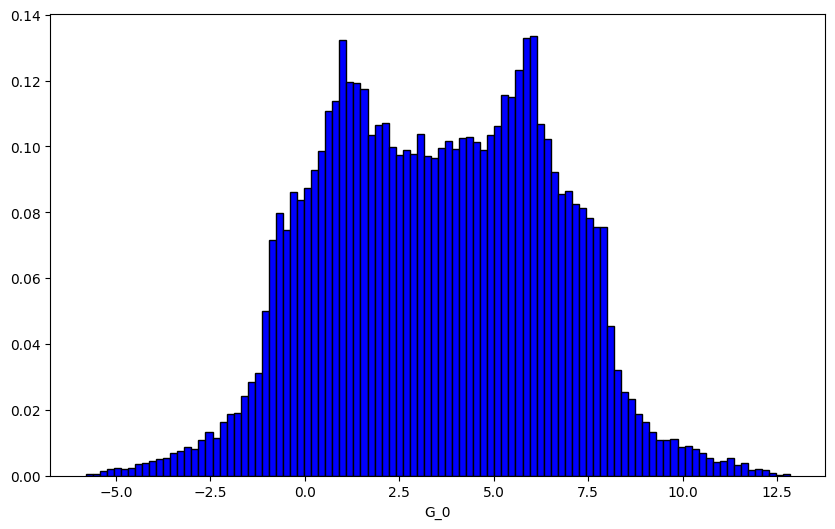

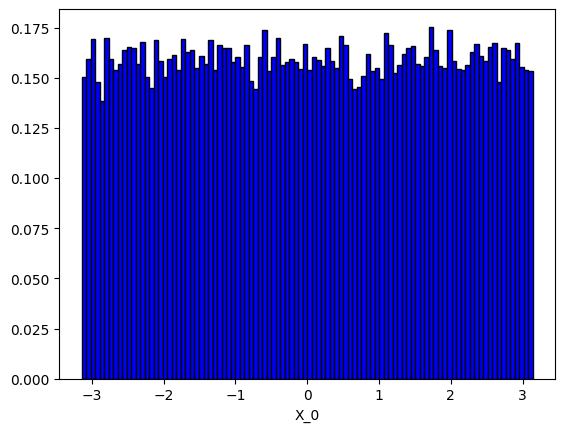

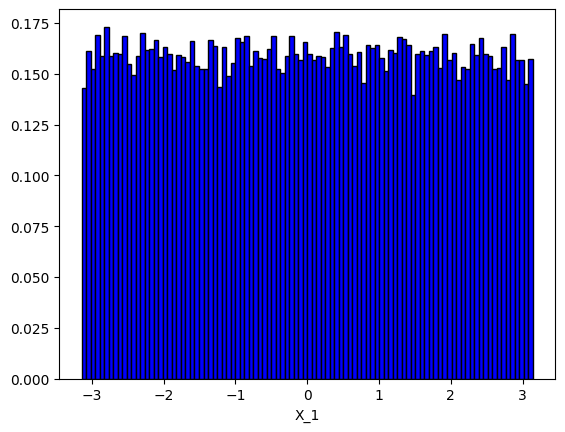

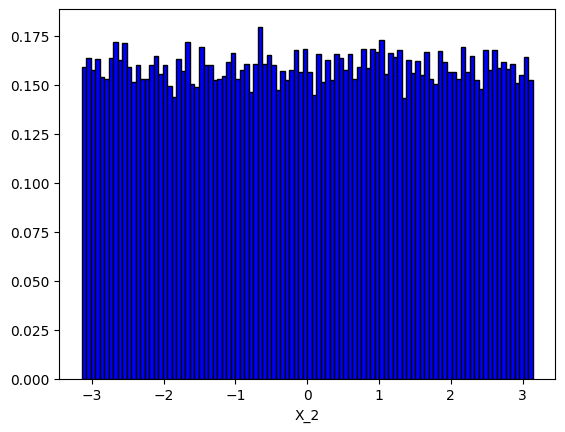

In [5]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import ishigami
import matplotlib.pyplot as plt

# Dataset
f = {'type': 'uniform', 'parameters': {'min': -np.pi, 'max': np.pi}, 'stochastic variable': False}
p = {'type': 'uniform', 'parameters': {'min': -np.pi, 'max': np.pi}, 'stochastic variable': False}
w = {'type': 'uniform', 'parameters': {'min': -np.pi, 'max': np.pi}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 50000, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': ishigami,
             'name simulation': None,
        }

# Call algorithm
a = sampling_algorithm_structural_analysis_kernel(setup)


plt.figure(figsize=(10, 6)) 
plt.hist(a['G_0'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('G_0')
plt.show()

plt.hist(a['X_0'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_0')
plt.show()

plt.hist(a['X_1'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_1')
plt.show()


plt.hist(a['X_2'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_2')
plt.show()

In [6]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_time_example
import numpy as np

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': True}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'mcs-time', 'time steps': 2}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': {'time analysis': list(np.linspace(0, 50, num=2, endpoint=True))},
             'objective function': nowak_collins_time_example,
             'name simulation': None,
        }

# Call algorithm
ee = sampling_algorithm_structural_analysis_kernel(setup)
from tabulate import tabulate
table = tabulate(ee, headers='keys', tablefmt='psql')
print(table)

+-----+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|     |   X_0_t=0 |   X_0_t=1 |   X_1_t=0 |   X_1_t=1 |   X_2_t=0 |   X_2_t=1 |   STEP_t_0 |   STEP_t_1 |   R_0_t=0 |   R_0_t=1 |   S_0_t=0 |   S_0_t=1 |   G_0_t=0 |   G_0_t=1 |   I_0_t=0 |   I_0_t=1 |
|-----+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------|
|   0 |   36.7183 |   40.0574 |   9.95521 |   9.95521 |  0.241802 |  0.241802 |          0 |          1 |   2937.47 |   3204.46 |   1947.77 |   1947.77 |  989.698  | 1256.69   |         0 |         0 |
|   1 |   34.9153 |   38.8697 |   8.78401 |   8.78401 |  0.279972 |  0.279972 |          0 |          1 |   2793.23 |   3109.45 |   2107.13 |   2107.13 |  686.095  | 1002.32   |         0 |   

In [7]:
from parepy_toolbox import sampling

# Dataset: stochastic value in time series
model = {'model sampling': 'lhs-time', 'time steps': 3}
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False, 'seed': None}
q = {'type': 'normal', 'parameters': {'mean': 10.0, 'sigma': 2.00}, 'stochastic variable': False, 'seed': None}
varSet = [f, q]
size = 5

# Call function
r = sampling(size, model, varSet)

# Output details
print(f'random variables n={len(r)}: \n\n {r} \n\n type variable: {type(r)}')

random variables n=15: 

 [[40.63737843  8.94136953  0.        ]
 [40.63737843  8.94136953  1.        ]
 [40.63737843  8.94136953  2.        ]
 [38.86189383 14.31655717  0.        ]
 [38.86189383 14.31655717  1.        ]
 [38.86189383 14.31655717  2.        ]
 [42.85275445 12.65997824  0.        ]
 [42.85275445 12.65997824  1.        ]
 [42.85275445 12.65997824  2.        ]
 [39.7453474   9.02591655  0.        ]
 [39.7453474   9.02591655  1.        ]
 [39.7453474   9.02591655  2.        ]
 [43.81129918  9.54900551  0.        ]
 [43.81129918  9.54900551  1.        ]
 [43.81129918  9.54900551  2.        ]] 

 type variable: <class 'numpy.ndarray'>


In [8]:
from parepy_toolbox import deterministic_algorithm_structural_analysis
from obj_function import form_1, grad_form_1

# Dataset
# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': True}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

setup = {   
            'objective function': form_1,
            'gradient objective function': grad_form_1,
             'numerical model': {'model': 'fosm', 'initial guess': [0, 0, 0]}, 
             'tolerance': 1e-6, 
             'max iterations': 1000,
             'none variable': None,
             'variables settings': var,  
             'number of iterations': 10,
        }


results_about_data, failure_prob_list, beta_list = deterministic_algorithm_structural_analysis(setup)

Jxy:  [[4.64  0.    0.   ]
 [0.    1.12  0.   ]
 [0.    0.    0.025]]
JxyT  [[4.64  0.    0.   ]
 [0.    1.12  0.   ]
 [0.    0.    0.025]]
Jyx:  [[ 0.21551724  0.          0.        ]
 [ 0.          0.89285714  0.        ]
 [ 0.          0.         40.        ]]
y:  [[ -8.68534483]
 [ -9.10714286]
 [-10.        ]]
g_y:  -1400
g_diff_x:  [[0]
 [0]
 [0]]
g_diff_y:  [[0.]
 [0.]
 [0.]]
num:  [[1400.]]
den:  0.0
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan nan]]
y:  [[nan]
 [nan]
 [nan]]
g_y:  nan
g_diff_x:  [[nan]
 [nan]
 [nan]]
g_diff_y:  [[nan]
 [nan]
 [nan]]
num:  [[nan]]
den:  nan
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan nan]]
y:  [[nan]
 [nan]
 [nan]]
g_y:  nan
g_diff_x:  [[nan]
 [nan]
 [nan]]
g_diff_y:  [[nan]
 [nan]
 [nan]]
num:  [[nan]]
den:  nan
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan nan]]
y:  [[nan]
 [nan]
 [nan]]
g_y:  nan
g_diff_x:  [[nan]
 [nan]
 [nan]]
g_diff_y:  [[nan]
 [nan]
 [nan]]
num:  [[nan]]
den:  nan
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan 

C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY\parepy_toolbox\common_library.py:432: RuntimeWarning: divide by zero encountered in scalar divide
  aux = num / den
C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY\parepy_toolbox\common_library.py:433: RuntimeWarning: invalid value encountered in multiply
  y_new = aux * grad_y_k


In [9]:
results_about_data

,x0,x1,y0,y1,state limit function,ϐ new
0,0.0,0.0,-8.685345,-9.107143,-1400.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
